In [6]:
import math
import numpy as np

from tools import bathymetry
from tools import classes
from tools import visualization as visu

In [7]:
# Paramètres du modèle

t_0 = 0 # Initial time
t_f = 2 # Max time
dt = 0.1 # Time step (days)

time = np.arange(t_0, t_f + dt, dt)

depth = 10
width = 20
res = 0.5

row_dims = int(depth / res)
col_dims = int(width / res)

In [8]:
# Variables

light = classes.Variable2d(time, row_dims, col_dims, 0, "Light")

In [9]:
# Model loop

for t in range(0, len(time)) :
  for row in range(0, row_dims) :
    for col in range(0, col_dims) :
      if (row_dims - row > bathymetry.bathymetry(col)) :
        light.value[t, row, col] = (math.sin(t) + 1) * (1 - row / row_dims)
      else :
        light.value[t, row, col] = np.nan

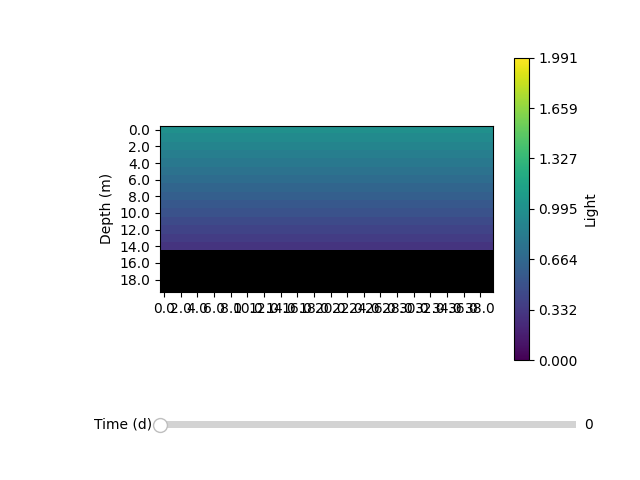

In [10]:
%matplotlib ipympl

plot = visu.cross_plot(light, t_0, t_f, dt, row_dims, col_dims, res)